# Implementation of Decision Tree from Scratch

### Documentation to be continued...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
data = pd.read_csv('hotel_experience.csv')

In [3]:
data.head(10)

,Unnamed: 0,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,overall experience
0,0,32746,Female,32,academic,Group Travel,Individual/Couple,5,5,2,5,5,5,5,1,2,5,good
1,1,52532,Male,44,business,Group Travel,Group bookings,3,3,3,3,5,3,4,2,4,1,good
2,2,62644,Male,64,tourism,Personal Travel,Individual/Couple,3,5,3,3,1,1,1,3,5,1,bad
3,3,57270,Female,36,academic,Group Travel,Group bookings,2,4,4,4,4,3,2,1,2,2,bad
4,4,18607,Female,80,tourism,Group Travel,Individual/Couple,2,4,2,5,4,4,4,2,2,4,bad
5,5,22406,Female,57,business,Group Travel,Individual/Couple,4,2,2,2,2,4,3,3,3,3,good
6,6,64260,Male,32,tourism,Group Travel,Group bookings,5,5,2,5,4,4,4,3,4,4,good
7,7,82864,Male,29,personal,Group Travel,Group bookings,1,1,1,1,5,5,5,3,4,5,good
8,8,113731,Female,7,tourism,Personal Travel,Individual/Couple,0,5,0,4,4,4,4,4,4,4,good
9,9,56594,Female,51,aviation,Group Travel,Group bookings,1,1,1,1,3,4,5,3,5,4,good


In [4]:
mydata=data.drop(['Unnamed: 0','id'], axis=1)
mydata.head(1)

,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,overall experience
0,Female,32,academic,Group Travel,Individual/Couple,5,5,2,5,5,5,5,1,2,5,good


In [5]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,39.36621,15.122459,7.0,27.0,40.0,51.0,85.0
Hotel wifi service,100000.0,2.72942,1.327962,0.0,2.0,3.0,4.0,5.0
Departure/Arrival convenience,100000.0,3.06171,1.524823,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,100000.0,2.75686,1.398951,0.0,2.0,3.0,4.0,5.0
Hotel location,100000.0,2.97742,1.276803,0.0,2.0,3.0,4.0,5.0
Food and drink,100000.0,3.20154,1.329879,0.0,2.0,3.0,4.0,5.0
Stay comfort,100000.0,3.43890,1.319433,0.0,2.0,4.0,5.0,5.0
Common Room entertainment,100000.0,3.35836,1.333123,0.0,2.0,4.0,4.0,5.0
Checkin/Checkout service,100000.0,3.30373,1.265509,0.0,3.0,3.0,4.0,5.0
Other service,100000.0,3.64056,1.176213,0.0,3.0,4.0,5.0,5.0


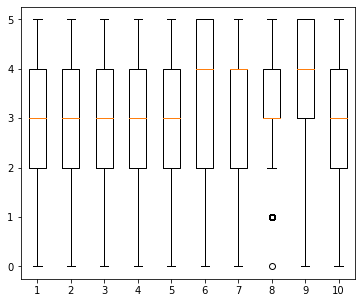

In [6]:
fig = plt.figure(figsize =(6, 5))
plt.boxplot(mydata.drop(['Age','Gender','purpose_of_travel','Type of Travel','Type Of Booking','overall experience'],axis='columns'))
plt.show()

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Gender                          100000 non-null  object
 1   Age                             100000 non-null  int64 
 2   purpose_of_travel               100000 non-null  object
 3   Type of Travel                  100000 non-null  object
 4   Type Of Booking                 100000 non-null  object
 5   Hotel wifi service              100000 non-null  int64 
 6   Departure/Arrival  convenience  100000 non-null  int64 
 7   Ease of Online booking          100000 non-null  int64 
 8   Hotel location                  100000 non-null  int64 
 9   Food and drink                  100000 non-null  int64 
 10  Stay comfort                    100000 non-null  int64 
 11  Common Room entertainment       100000 non-null  int64 
 12  Checkin/Checkout service       

In [8]:
mydata.duplicated().sum()

1329

In [9]:
data.id.duplicated().sum()

0

In [10]:
corr = mydata.corr()

''

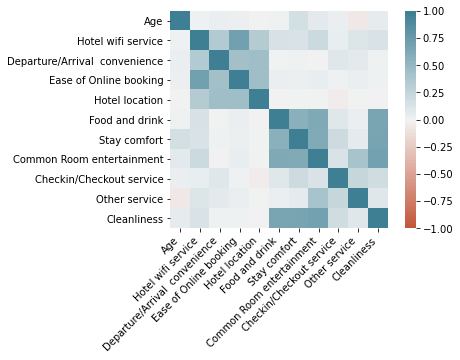

In [11]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
;

<Figure size 432x288 with 0 Axes>

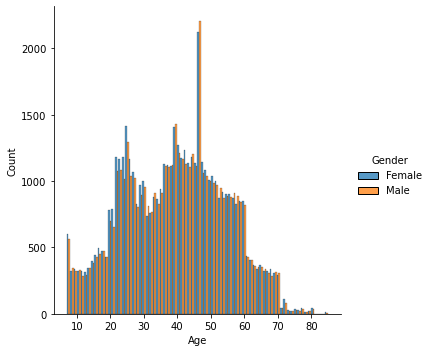

In [12]:
plt.figure()
sns.displot(mydata, x="Age", hue="Gender", multiple="dodge")
plt.show()

In [13]:
mydata.rename(columns = {'Type of Travel': 'Travel_type', 'Type Of Booking': 'Booking_type', 'overall experience': 'Overall_experience'}, inplace = True)


In [14]:
travel_purposes=[]
for i in range(len(mydata.purpose_of_travel)):
    if mydata.purpose_of_travel[i] not in travel_purposes:
            travel_purposes.append(mydata.purpose_of_travel[i])
travel_purposes



['academic', 'business', 'tourism', 'personal', 'aviation']

In [15]:
def str_to_num(s):
    if s in travel_purposes:
        return travel_purposes.index(s)
    else:
        return s

mydata.purpose_of_travel=mydata.purpose_of_travel.map(str_to_num)
mydata.head()

,Gender,Age,purpose_of_travel,Travel_type,Booking_type,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,Overall_experience
0,Female,32,0,Group Travel,Individual/Couple,5,5,2,5,5,5,5,1,2,5,good
1,Male,44,1,Group Travel,Group bookings,3,3,3,3,5,3,4,2,4,1,good
2,Male,64,2,Personal Travel,Individual/Couple,3,5,3,3,1,1,1,3,5,1,bad
3,Female,36,0,Group Travel,Group bookings,2,4,4,4,4,3,2,1,2,2,bad
4,Female,80,2,Group Travel,Individual/Couple,2,4,2,5,4,4,4,2,2,4,bad


In [16]:
from random import randrange
from myDecisionTree import *
import random
import time
import copy

In [17]:
test_ratio=0.2
n_folds = 4

In [18]:
test_size=round(test_ratio*(len(mydata)))
indices = mydata.index.tolist()
testIndices = random.sample(population = indices, k = test_size)
dataFrameTest = mydata.loc[testIndices]
dataFrameTrain = mydata.drop(testIndices)

In [19]:
mytestlist=dataFrameTest.values.tolist() 
mylist=dataFrameTrain.values.tolist()
header=list(mydata.columns)

In [20]:
print(header)

['Gender', 'Age', 'purpose_of_travel', 'Travel_type', 'Booking_type', 'Hotel wifi service', 'Departure/Arrival  convenience', 'Ease of Online booking', 'Hotel location', 'Food and drink', 'Stay comfort', 'Common Room entertainment', 'Checkin/Checkout service', 'Other service', 'Cleanliness', 'Overall_experience']


In [21]:
print(unique_vals(mylist,0))
print(unique_vals(mylist,3))
print(unique_vals(mylist,4))
print(unique_vals(mylist,15))

{'Male', 'Female'}
{'Personal Travel', 'Group Travel'}
{'Individual/Couple', 'Group bookings', 'Not defined'}
{'good', 'bad'}


In [22]:
dataset_split = list()
dataset_copy = list(mylist)
fold_size = int(len(mylist) / n_folds)
for i in range(n_folds):
    fold = list()
    while len(fold) < fold_size:
        index = randrange(len(dataset_copy))
        fold.append(dataset_copy.pop(index))
    dataset_split.append(fold)


In [23]:
print("\n=====================================================================")
print("******* Decision Tree built on 'Hotel Experience' Dataset  **********")
print("=====================================================================\n")

i=1
algo_type=1 # 0 for gini impurity, 1 for entropy
max_acc=0.0
mytime=0.0
folds=dataset_split
scores = list()
for fold in folds:
    trainDF = list(folds)
    trainDF.remove(fold)
    trainDF = sum(trainDF, [])
    testDF = list()
    for row in fold:
        row_copy = list(row)
        testDF.append(row_copy)
    
    print("Validation Set = {}: ".format(i), end = "")
    startTime = time.time()
    tree = build_tree(trainDF, header, algo_type)
    buildTime = time.time() - startTime
    acc = computeAccuracy(testDF, tree)
    if (acc > max_acc):
        max_acc = acc
        mytree = tree
        mytrainer = copy.deepcopy(trainDF)
        mytime=buildTime
    print("with Test Accuracy = {0:.3f}%, ".format(acc*100), end = "")
    print("Built in time = {0:.2f}s".format(buildTime), end = "\n")
    i+=1
    
TestAccuracy = computeAccuracy(mytestlist, mytree)
print("\nAccuracy of best tree with testing data before pruning: {0:.2f}% ".format(TestAccuracy*100), end="\n")



******* Decision Tree built on 'Hotel Experience' Dataset  **********

Validation Set = 1: with Test Accuracy = 92.230%, Built in time = 57.67s
Validation Set = 2: with Test Accuracy = 92.425%, Built in time = 56.92s
Validation Set = 3: with Test Accuracy = 92.650%, Built in time = 59.22s
Validation Set = 4: with Test Accuracy = 92.495%, Built in time = 55.32s

Accuracy of best tree with testing data before pruning: 92.31% 


## Post-Pruning of the tree

In [24]:
# Pruning of tree
innerNodes = getInnerNodes(mytree)
best_tree=mytree
lastAcc=0.0
maxAccuracy=TestAccuracy
get_time=time.time()
nodeIdToPrune = -1
for node in innerNodes:
    if node.id != 0:
        temp_tree = copy.deepcopy(best_tree)
        prune_tree(temp_tree, [node.id])
        currentAccuracy = computeAccuracy(mytestlist, temp_tree)
        
        if currentAccuracy > lastAcc:
            lastAcc=currentAccuracy
            print("Pruned node_id: " + str(node.id) + " to achieve accuracy: {0:.3f}%".format(currentAccuracy*100))

        if currentAccuracy > maxAccuracy:
            maxAccuracy = currentAccuracy
            nodeIdToPrune = node.id
        
        if maxAccuracy == 1:
            break
        if (time.time()- get_time) > 500:
            break
    

Pruned node_id: 2 to achieve accuracy: 80.745%
Pruned node_id: 6 to achieve accuracy: 90.135%
Pruned node_id: 14 to achieve accuracy: 92.240%
Pruned node_id: 29 to achieve accuracy: 92.295%
Pruned node_id: 60 to achieve accuracy: 92.315%
Pruned node_id: 61038 to achieve accuracy: 92.320%
Pruned node_id: 122077 to achieve accuracy: 92.325%
Pruned node_id: 941 to achieve accuracy: 92.330%


In [25]:
if nodeIdToPrune != -1:
    prune_tree(mytree, [nodeIdToPrune])
    print("\nFinal node Id to prune (for max accuracy): " + str(nodeIdToPrune))
else:
    print("\nPruning strategy could'nt increase accuracy")

train_acc=computeAccuracy(mytrainer, mytree)
leaves = getLeafNodes(mytree)
mydepth =0
leaf_count=0
for leaf in leaves:
    if leaf.depth > mydepth:
        mydepth = leaf.depth
    leaf_count+=1
print("\n====================================================================")
print("***********   Final Tree with test accuracy: " + str(maxAccuracy*100) + "%   **************")
print("====================================================================\n")



Final node Id to prune (for max accuracy): 941

***********   Final Tree with test accuracy: 92.33%   **************



# Comparing with scikit-learn Implementation 

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

pd.options.mode.chained_assignment = None

In [27]:
Gender_Mapping = {"Female": 0, "Male": 1}
Travel_type_Mapping = {"Personal Travel": 0, "Group Travel": 1}
Booking_type_Mapping = {"Not defined": 0, "Individual/Couple": 1, "Group bookings": 2}
Overall_experience_Mapping = {"bad": 0, "good": 1}
mydata.Gender=mydata.Gender.map(Gender_Mapping)
mydata.Travel_type=mydata.Travel_type.map(Travel_type_Mapping)
mydata.Booking_type=mydata.Booking_type.map(Booking_type_Mapping)
mydata.Overall_experience=mydata.Overall_experience.map(Overall_experience_Mapping)
mydata.head(1)

,Gender,Age,purpose_of_travel,Travel_type,Booking_type,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,Overall_experience
0,0,32,0,1,1,5,5,2,5,5,5,5,1,2,5,1


In [28]:
# Seperating to X and Y 
X = mydata.iloc[:, :14]
y = mydata.iloc[:, -1]

# splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=24)

In [29]:
max_depth=[]
acc_gini=[]
acc_entropy=[]
run_time_g=[]
run_time_e=[]
for i in range(5,35):
    t1=time.time()
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train,y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(accuracy_score(y_test,pred))
    run_time_g.append(time.time()-t1)
    
    t2=time.time()
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(X_train,y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(accuracy_score(y_test,pred))
    run_time_e.append(time.time()-t2)
    
    max_depth.append(i)
    
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 'acc_entropy':pd.Series(acc_entropy), 
                  'max_depth':pd.Series(max_depth), 'time_gini':pd.Series(run_time_g), 
                  'time_entropy':pd.Series(run_time_e)})

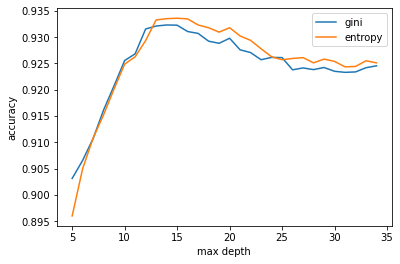

In [30]:
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

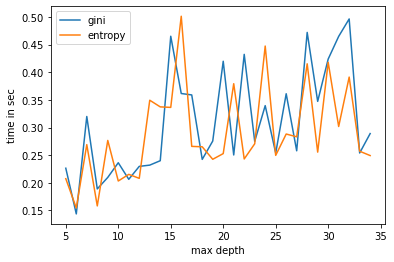

In [31]:
plt.plot('max_depth','time_gini', data=d, label='gini')
plt.plot('max_depth','time_entropy', data=d, label='entropy')
plt.xlabel('max depth')
plt.ylabel('time in sec')
plt.legend()
plt.show()

In [32]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

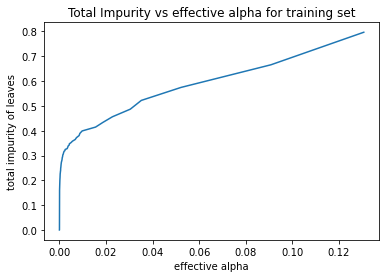

In [33]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1])
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [34]:
clfs = []
count=0
skip=0
run=0
good_ccp_alphas=[]
for ccp_alpha in ccp_alphas:
    count+=1
    if count != 50:
        skip+=1
        continue
    
    if ccp_alpha > 0.000175:
        break
    clf = DecisionTreeClassifier(criterion='entropy', random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    good_ccp_alphas.append(ccp_alpha)
    
    count=0
    run+=1
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))
print("Number of trees skipped: {}\nBuilt Trees: {}".format(skip,run))

Number of nodes in the last tree is: 643 with ccp_alpha: 0.19185551655988398
Number of trees skipped: 2107
Built Trees: 42


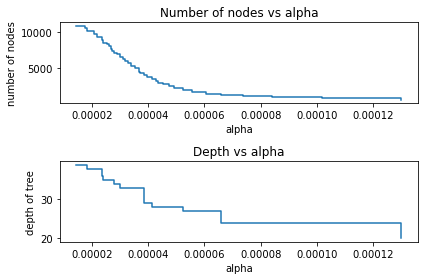

In [35]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(good_ccp_alphas, node_counts, marker='', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(good_ccp_alphas, depth, marker='', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

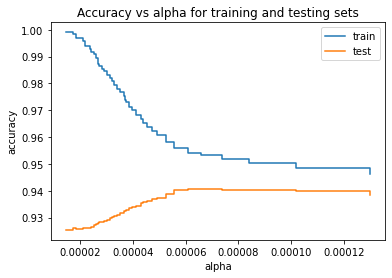

In [36]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(good_ccp_alphas, train_scores, marker='', label="train",
        drawstyle="steps-post")
ax.plot(good_ccp_alphas, test_scores, marker='', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [37]:
start=time.time()
dt = DecisionTreeClassifier(criterion='entropy', random_state=0, ccp_alpha=0.000066)
dt.fit(X_train, y_train)
y_preds = dt.predict(X_test)
train_preds = dt.predict(X_train) 
dt_depth = dt.tree_.max_depth
libtime=time.time()-start

In [38]:
print("\nSklearn Implementation:")
print("Test Accuracy  = {0:.3f}% ".format(accuracy_score(y_test, y_preds)*100), end = "\n")
print("Train Accuracy = {0:.3f}% ".format(accuracy_score(y_train, train_preds)*100), end = "\n")
print("Build time     = {0:.2f}s".format(libtime), end = "\n")
print("Depth          = {}".format(dt_depth), end = "\n")

print("\nMy Decision Tree Implementation: ")
print("Test Accuracy  = {0:.3f}% ".format(maxAccuracy*100), end = "\n")
print("Train Accuracy = {0:.3f}% ".format(train_acc*100), end = "\n")
print("Build time     = {0:.2f}s".format(buildTime), end = "\n")
print("Depth          = {}".format(mydepth), end = "\n")


Sklearn Implementation:
Test Accuracy  = 94.064% 
Train Accuracy = 95.319% 
Build time     = 0.39s
Depth          = 24

My Decision Tree Implementation: 
Test Accuracy  = 92.330% 
Train Accuracy = 99.942% 
Build time     = 55.32s
Depth          = 37


# Printing the Decision Tree Features

In [39]:
print("\n==============================")
print("******* Decision Tree ********")
print("==============================\n")
#print_tree(mytree)


******* Decision Tree ********



In [40]:
# get leaf 
print("\n==============================")
print("******** Leaf nodes **********")
print("==============================")
leaves = getLeafNodes(mytree)
max_depth =0
leaf_count=0
for leaf in leaves:
    #print("id = " + str(leaf.id) + " at depth = " + str(leaf.depth))
    if leaf.depth > max_depth:
        max_depth = leaf.depth
    leaf_count+=1


******** Leaf nodes **********


In [41]:
# get inner nodes
print("\n==============================")
print("****** Non-Leaf nodes ********")
print("==============================")
innerNodes = getInnerNodes(mytree)
node_count=0
for inner in innerNodes:
    #print("id = " + str(inner.id) + " depth =" + str(inner.depth))
    node_count+=1


****** Non-Leaf nodes ********


In [42]:
print("Number of Leaf Nodes:      ", leaf_count)
print("Number of Internal Nodes:  ", node_count)
print("Maximum Depth:             ", max_depth)

Number of Leaf Nodes:       8344
Number of Internal Nodes:   8358
Maximum Depth:              37
